In [21]:
import interp_test
import sys
sys.path.append("../tensorflow")  
import load_PSFs
import pdb
import matplotlib.pyplot as plt

In [2]:
psf_directory = "/home/dshteinbok/nV3_PSFs_flat"
psf_meta = "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv"

In [3]:
img_dims = (800, 1280)
obj_dims = (640, 1024)
metaman = load_PSFs.MetaMan(psf_meta) 

In [4]:
# pdb.set_trace()
h, weights, indices = interp_test.generate_unpadded_nointerp(psf_directory, img_dims, obj_dims, method="linear")

creating matrix

done

starting svd...

check values of ymat


In [5]:
h.shape

(32, 32, 28)

In [6]:
weights.shape

(28, 29)

In [7]:
%debug
winterped = interp_test.interped_kernels(weights, indices, metaman, img_dims, obj_dims, method="linear")

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
(winterped - weights)/weights

array([[ 1.88106181e+01, -1.15338386e+00,  2.74420283e-01,
        -6.83180742e+00, -6.72398412e+00,  6.40400074e+00,
         1.18583049e-01, -9.37333542e-01,  1.83428498e+00,
         3.11464339e+01, -2.26641339e+00, -9.63750985e-01,
        -1.13453125e+00, -8.90088285e-01,  1.17730639e-01,
         2.56218305e+03, -1.32649877e+03,  7.94965005e+00,
         3.03162144e-01, -4.62561534e+02, -3.34857872e+01,
        -1.53978575e+00, -9.94039634e-01, -1.01179259e+00,
        -1.00271395e+00, -9.36723694e-01, -1.04221176e+00,
        -7.03120133e-01, -9.11948343e-01],
       [ 8.94989466e-01, -9.19901595e-01, -8.34292196e-01,
        -1.46733842e+01, -2.05663807e+01,  4.72887904e+00,
         1.07299734e+02, -6.53749541e-01, -2.56870924e+00,
        -2.20571881e+00,  4.90828328e+00, -1.04575536e+00,
        -9.91311883e-01, -1.05698910e+00, -9.80138655e-01,
         3.27381428e+00, -4.42120758e+00, -2.01291975e+00,
        -9.84570416e-01, -1.84282270e+01, -2.01735751e+00,
        -1.11

In [12]:
import numpy as np
a = np.arange(36).reshape((3,3,4))

In [16]:
a.reshape((9,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35]])

In [17]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35]]])

In [18]:
h_matrix = h.reshape(1024,28)

In [25]:
reshaped_psfs_gt = np.matmul(h_matrix, weights)
reshaped_psfs_interp = np.matmul(h_matrix, winterped)

In [22]:
reshaped_psfs_gt.shape

(1024, 29)

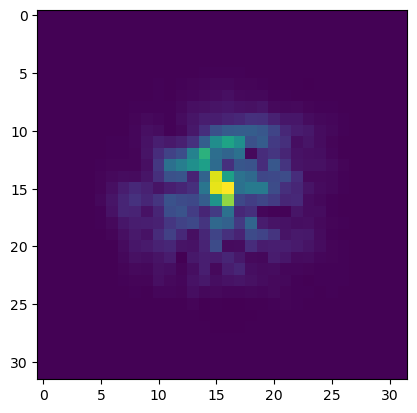

In [24]:
plt.imshow(reshaped_psfs_gt.reshape((32,32,29))[:,:,0])

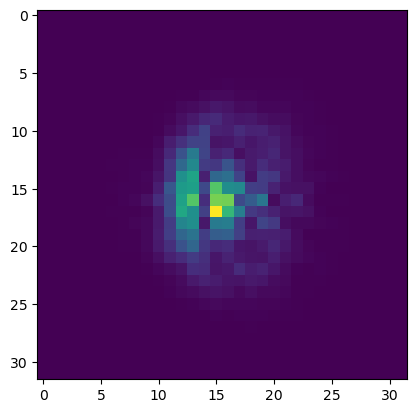

In [27]:
plt.imshow(reshaped_psfs_interp.reshape((32,32,29))[:,:,0])

Text(0.5, 1.0, 'Interpolated PSF')

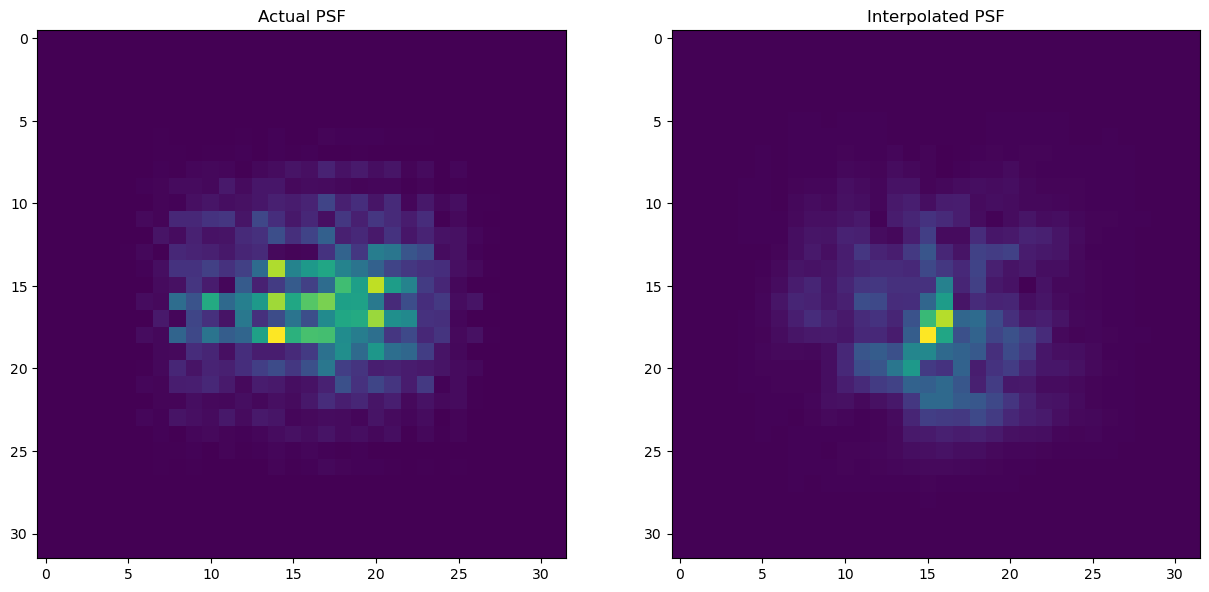

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
j = 5
axs[0].imshow(reshaped_psfs_gt.reshape((32,32,29))[:,:,j])
axs[0].set_title("Actual PSF")
axs[1].imshow(reshaped_psfs_interp.reshape((32,32,29))[:,:,j])
axs[1].set_title("Interpolated PSF")

In [38]:
for  i in indices:
    print("Field: ", i)
    print("At position: ", metaman.field_origins[i])
    print("")

Field:  1
At position:  [200.0, 0.0]

Field:  10
At position:  [200.0, 400.0]

Field:  11
At position:  [400.0, 400.0]

Field:  12
At position:  [-200.0, 0.0]

Field:  13
At position:  [-400.0, 0.0]

Field:  14
At position:  [-600.0, 0.0]

Field:  15
At position:  [-200.0, -200.0]

Field:  16
At position:  [-400.0, -200.0]

Field:  17
At position:  [-200.0, -400.0]

Field:  18
At position:  [-400.0, -400.0]

Field:  19
At position:  [-200.0, 200.0]

Field:  2
At position:  [400.0, 0.0]

Field:  20
At position:  [-400.0, 200.0]

Field:  21
At position:  [-200.0, 400.0]

Field:  22
At position:  [-400.0, 400.0]

Field:  23
At position:  [0.0, 0.0]

Field:  24
At position:  [0.0, 200.0]

Field:  25
At position:  [0.0, 400.0]

Field:  26
At position:  [0.0, 600.0]

Field:  27
At position:  [0.0, -200.0]

Field:  28
At position:  [0.0, -400.0]

Field:  29
At position:  [0.0, -600.0]

Field:  3
At position:  [600.0, 0.0]

Field:  4
At position:  [200.0, -200.0]

Field:  5
At position:  [400.